In [5]:
%matplotlib inline
import matplotlib.pyplot as plt # Module for plotting
import numpy as np
from scipy.integrate import odeint

## Ex 4 - Nonlinear Equation

The van der Pol equation describes a nonlinearly damped oscillator. It can't be solved analytically, but using a computer it's no more difficult than the others. The equation is:

$$\frac{d^2 x}{dt^2} - \mu (1 - x^2) \frac{d x}{d t} + x = 0$$

**Exercise**: Make a phase plot of this for different $\mu$, as well as different initial conditions. Also plot $x(t)$. The [Wikipedia page](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator) contains result you can compare against.

In [3]:
times = np.linspace(0, 10, 400)

def deriv(state, t, mu):
    x, vx = state
    dxdt = vx
    dvxdt = mu*(1-x**2)*vx - x
    return (dxdt, dvxdt) # Return a tuple of the derivatives.

def vanderpol(x0, v0, mu):
    x_init = (x0, v0)
    return odeint(deriv, (x0, v0), times, args=(mu,))

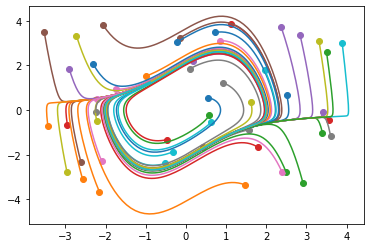

In [6]:
for idx in range(50):
    x0 = np.random.uniform(-4,4)
    v0 = np.random.uniform(-4,4)
    xarr  = vanderpol(x0, v0, 1.)
    plt.scatter(x0, v0)
    plt.plot(xarr[:,0], xarr[:,1])